<div align=center>

<p></p>
<p></p>
<font size=5>

<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Spring 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 3
			</font>
    <br/>
<font size=4>

<br/>
<b>

Kian Izadpanah 400104783
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



# Personal Data

In [1]:
first_name = 'Kian'
last_name = 'Izadpanah'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Preprocessing

Import your needed libraries in following cell.

In [2]:
# TODO: Write your code here
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable. 

In [3]:
# TODO: Write your code here
df = pd.read_csv("/kaggle/input/satimage/satimage.csv")
label = df['label']
features = df.drop("label", axis=1)

Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [4]:
# TODO: Write your code here
X_train, X_other, y_train, y_other = train_test_split(features, label, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.625, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)
X_test = StandardScaler().fit_transform(X_test)

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [5]:
# TODO: Write your code here
train_indices = np.where((y_train == 4) | (y_train == 6))[0]
val_indices = np.where((y_val == 4) | (y_val == 6))[0]
test_indices = np.where((y_test == 4) | (y_test == 6))[0]

X_train = X_train[train_indices]
X_val = X_val[val_indices]
X_test = X_test[test_indices]

y_train = y_train.iloc[train_indices].replace({4: 1, 6: -1}).values
y_val = y_val.iloc[val_indices].replace({4: 1, 6: -1}).values
y_test = y_test.iloc[test_indices].replace({4: 1, 6: -1}).values

# Model (50 points)

Here is soft margin svm convex optimization formulation. 
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

Considering using Lagrange formulation we get:
$$
\begin{aligned}
\text { Maximize } & \sum_{n=1}^N \alpha_n - \frac{1}{2}\sum_{n=1}^N \sum_{m=1}^M \alpha_n \alpha_m y^n y^m (x^n)^T x^m\\
\text { Subject to } & \sum_{n=1}^N \alpha_n y^n = 0 \\
& 0 \leq \alpha_n \leq C, \quad n=1,2, \ldots, N
\end{aligned}
$$

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [6]:
!pip install cvxopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 89.2 MB/s eta 0:00:00:00:010:01


In [7]:
from cvxopt import matrix, solvers

def soft_margin_svm(X, y, C):
    n_samples, n_features = X.shape
    P = matrix(np.outer(y, y) * np.dot(X, X.T))
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)
    
    sol = solvers.qp(P, q, G, h, A, b)

    alphas = np.array(sol['x'])
    
    support_vector_indices = np.where(alphas > 1e-6)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas

In [8]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train, np.array(y_train), C)

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  1e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  1e-13
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  1e-13
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  1e-13
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  1e-13
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  1e-13
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  1e-13
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  1e-13
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  1e-13
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  1e-13
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  1e-13
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  1e-13
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  1e-13
Optimal solution found.


In [9]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # TODO: Write your code here
    y_pred = np.zeros(len(x_test))
    for i, x in enumerate(x_test):
        tmp = np.sum(support_vector_alphas * support_vector_labels * 
                                   np.array([np.dot(sv, x) for sv in support_vectors]))
        if tmp == 0:
            y_pred[i] = 1
        else:
            y_pred[i] = np.sign(tmp)
        
    return y_pred

In [10]:
y_pred = predict_labels(np.array(X_test), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [11]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import seaborn as sns

def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.7843866171003717
Balanced Accuracy:  0.6622925966478564
Confusion Matrix:
 [[364  19]
 [ 97  58]]


<Axes: >

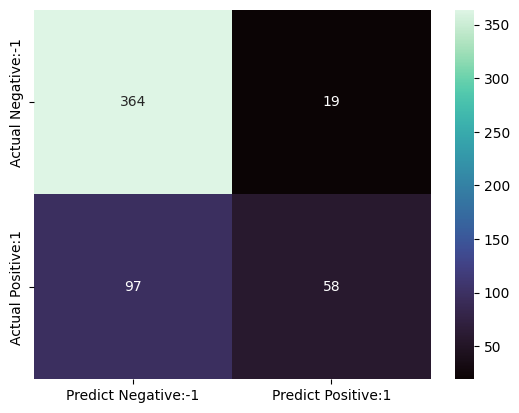

In [12]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [13]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    return np.exp(-gamma * np.linalg.norm(x1[:, np.newaxis] - x2, axis=2)**2)

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    K = rbf(X, X, gamma)
    n_samples, n_features = X.shape
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)
    
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    
    alphas = np.array(sol['x'])
    
    support_vector_indices = np.where(alphas > 1e-6)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas

In [14]:
gammas = [0.01, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best_balanced_accuracy = 0
# TODO: Write your code here
C = 1.0
for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(np.array(X_train), np.array(y_train), C, gamma)
    y_pred = predict_labels(np.array(X_val), support_vectors, support_vector_labels, 
                            support_vector_alphas)
    _, balanced_accuracy, _ = evaluate(y_val, y_pred)
    if balanced_accuracy > best_balanced_accuracy:
        best_balanced_accuracy = balanced_accuracy
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas
print(best_gamma)

Accuracy:  0.7666666666666667
Balanced Accuracy:  0.666141933287951
Confusion Matrix:
 [[212  14]
 [ 63  41]]
Accuracy:  0.7696969696969697
Balanced Accuracy:  0.6527825051055139
Confusion Matrix:
 [[219   7]
 [ 69  35]]
Accuracy:  0.7636363636363637
Balanced Accuracy:  0.6431671204901293
Confusion Matrix:
 [[219   7]
 [ 71  33]]
Accuracy:  0.7666666666666667
Balanced Accuracy:  0.6479748127978217
Confusion Matrix:
 [[219   7]
 [ 70  34]]
Accuracy:  0.7666666666666667
Balanced Accuracy:  0.6479748127978217
Confusion Matrix:
 [[219   7]
 [ 70  34]]
0.01


In [15]:
y_pred = predict_labels(np.array(X_test), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8011152416356877
Balanced Accuracy:  0.7162890592099722
Confusion Matrix:
 [[351  32]
 [ 75  80]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]

# TODO: Write your code here
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.4, random_state=42)
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters: {'C': 10, 'gamma': 0.01}
Accuracy on test set: 0.891996891996892


Implement Multiclass SVM from scratch without using ready functions (optional).

In [17]:
from cvxopt import matrix, solvers

class MultiClassSVM:
    def __init__(self, kernel='rbf', gamma=1.0, C=1.0):
        self.kernel = kernel
        self.gamma = gamma
        self.C = C

    def rbf_kernel(self, x1, x2):
        x1 = np.array(x1, dtype=np.float64)
        x2 = np.array(x2, dtype=np.float64)
        return np.exp(-self.gamma * (np.linalg.norm(x1 - x2) ** 2))


    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)
        self.classifiers = {}

        for c in self.classes:
            y_binary = np.where(y == c, 1, -1)
            alpha = self._train_svm(X, y_binary)
            self.classifiers[c] = {'alpha': alpha}

    def _train_svm(self, X, y):
        n_samples, n_features = X.shape
        K = self.rbf_kernel(X, X)
        P = matrix(np.outer(y, y) * K)
        q = matrix(-np.ones(n_samples))
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
        h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))
        A = matrix(y, (1, n_samples), 'd')
        b = matrix(0.0)  

        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alpha = np.array(solution['x']).flatten()

        return alpha

    def predict(self, X):
        predictions = []
        for x in X:
            scores = {}
            for c, clf in self.classifiers.items():
                alpha = clf['alpha']
                prediction = np.dot(alpha * self.y_train, self.rbf_kernel(self.X_train, np.array([x])))
                scores[c] = prediction
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)

mc_svm = MultiClassSVM(kernel='rbf', gamma=10, C=0.01)
mc_svm.fit(X_train, y_train)
y_pred = mc_svm.predict(X_test)
_, _, conf_mat = evaluate(y_test, y_pred)

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.4, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

train_indices = np.where((y_train == 4) | (y_train == 6))[0]
test_indices = np.where((y_test == 4) | (y_test == 6))[0]

X_train = X_train[train_indices]
X_test = X_test[test_indices]

y_train = y_train.iloc[train_indices].replace({4: 1, 6: -1}).values
y_test = y_test.iloc[test_indices].replace({4: 1, 6: -1}).values

Accuracy:  0.793939393939394
Balanced Accuracy:  0.7431501021102791
Confusion Matrix:
 [[199  27]
 [ 41  63]]


<Axes: >

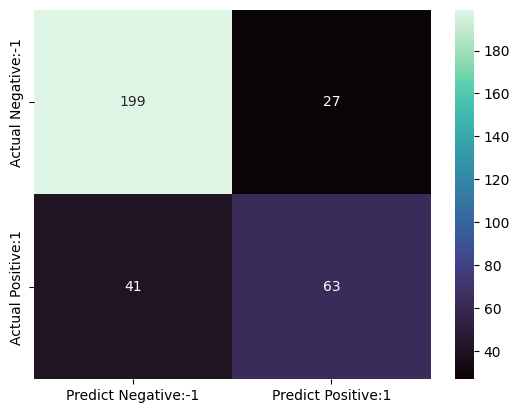

In [19]:
def linear(x1, x2):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    return np.sum(x1 * x2)
    

def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    K = linear(X, X)
    y = y.reshape(-1, 1)
    
    P = np.outer(y, y) * K
    P = matrix(P)
    
    q = -np.ones((X.shape[0], 1))
    q = matrix(q)
    
    G = np.eye(X.shape[0])
    G = matrix(G)
    
    h = np.ones(X.shape[0]) * C
    h = matrix(h)
    
    A = y.reshape(1, -1)
    A = matrix(A)
    
    b = matrix(0.0)
    
    sol = solvers.qp(P, q, G, h, A, b)
    
    alphas = np.array(sol['x'])
    
    support_vector_indices = np.where(alphas > 1e-6)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas


support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(np.array(X_train), np.array(y_train), C=1)
y_pred = predict_labels(np.array(X_val), support_vectors, support_vector_labels, support_vector_alphas)



linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train, y_train)
y_pred = linear_SVM.predict(X_val)
_, _, confusion_mat = evaluate(y_val, y_pred)

cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part. 

Accuracy:  0.8787878787878788
Balanced Accuracy:  0.8570030633083731
Confusion Matrix:
 [[207  19]
 [ 21  83]]


<Axes: >

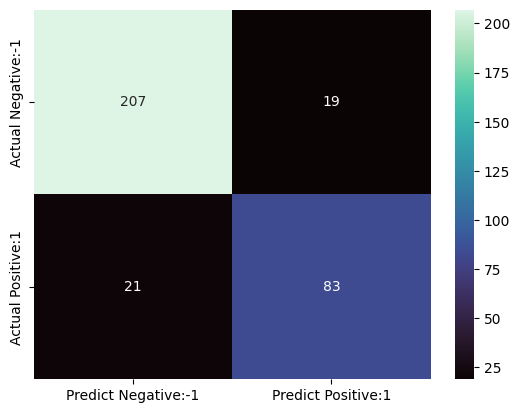

In [20]:
TODO: Write your code here
def gaussian_rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    return np.exp(-gamma * (np.linalg.norm(x1 - x2) ** 2))
    

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    K = gaussian_rbf(X, X, gamma)
    y = y.reshape(-1, 1)
    
    P = np.outer(y, y) * K
    P = matrix(P)
    
    q = -np.ones((X.shape[0], 1))
    q = matrix(q)
    
    G = np.eye(X.shape[0])
    G = matrix(G)
    
    h = np.ones(X.shape[0]) * C
    h = matrix(h)
    
    A = y.reshape(1, -1)
    A = matrix(A)
    
    b = matrix(0.0)
    
    sol = solvers.qp(P, q, G, h, A, b)
    
    alphas = np.array(sol['x'])
    
    support_vector_indices = np.where(alphas > 1e-6)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas


support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(np.array(X_train), np.array(y_train), C=1, gamma=0.01)
y_pred = predict_labels(np.array(X_val), support_vectors, support_vector_labels, support_vector_alphas)




rbf_SVM = SVC(kernel='rbf')
rbf_SVM.fit(X_train, y_train)
y_pred = rbf_SVM.predict(X_val)
_, _, confusion_mat = evaluate(y_val, y_pred)

cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy:  0.8757575757575757
Balanced Accuracy:  0.8573859768550034
Confusion Matrix:
 [[205  21]
 [ 20  84]]


<Axes: >

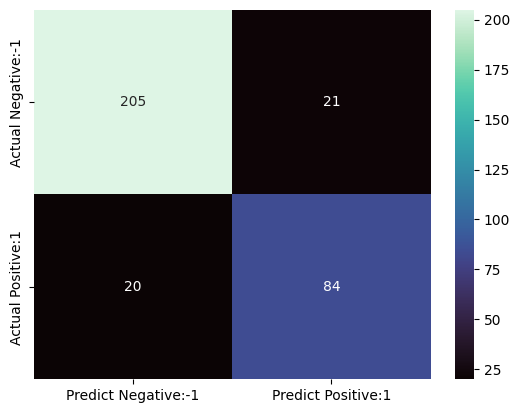

In [21]:
TODO: Write your code here
def polynomial(x1, x2, degree=3):
    """
    input:
        x1: first vector
        x2: second vector

    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    return (np.dot(x1, x2.T) + 1) ** degree
    

def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight

    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    K = polynomial(X, X)
    y = y.reshape(-1, 1)
    
    P = np.outer(y, y) * K
    P = matrix(P)
    
    q = -np.ones((X.shape[0], 1))
    q = matrix(q)
    
    G = np.eye(X.shape[0])
    G = matrix(G)
    
    h = np.ones(X.shape[0]) * C
    h = matrix(h)
    
    A = y.reshape(1, -1)
    A = matrix(A)
    
    b = matrix(0.0)
    
    sol = solvers.qp(P, q, G, h, A, b)
    
    alphas = np.array(sol['x'])
    
    support_vector_indices = np.where(alphas > 1e-6)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas


support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(np.array(X_train), np.array(y_train), C=1)
y_pred = predict_labels(np.array(X_val), support_vectors, support_vector_labels, support_vector_alphas)




poly_SVM = SVC(kernel='poly')
poly_SVM.fit(X_train, y_train)
y_pred = poly_SVM.predict(X_val)
_, _, confusion_mat = evaluate(y_val, y_pred)

cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts. 

Accuracy:  0.6303030303030303
Balanced Accuracy:  0.5769656228727025
Confusion Matrix:
 [[163  63]
 [ 59  45]]


<Axes: >

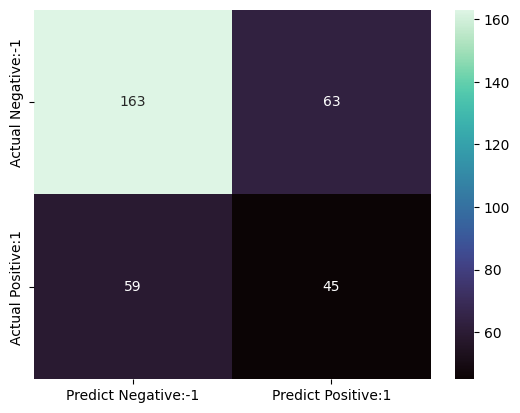

In [22]:
TODO: Write your code here
def sigmoid(x1, x2, a=1, c=0):
    """
    Compute the sigmoid kernel between two vectors

    Args:
    x1: First vector
    x2: Second vector

    Returns:
    The computed sigmoid kernel matrix
    """
    return np.tanh(a * np.dot(x1, x2.T) + c)

def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    K = sigmoid(X, X)
    y = y.reshape(-1, 1)
    
    P = np.outer(y, y) * K
    P = matrix(P)
    
    q = -np.ones((X.shape[0], 1))
    q = matrix(q)
    
    G = np.eye(X.shape[0])
    G = matrix(G)
    
    h = np.ones(X.shape[0]) * C
    h = matrix(h)
    
    A = y.reshape(1, -1)
    A = matrix(A)
    
    b = matrix(0.0)
    
    sol = solvers.qp(P, q, G, h, A, b)
    
    alphas = np.array(sol['x'])
    
    support_vector_indices = np.where(alphas > 1e-6)[0]
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas


support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(np.array(X_train), np.array(y_train), C=1)
y_pred = predict_labels(np.array(X_val), support_vectors, support_vector_labels, support_vector_alphas)




sigmoid_SVM = SVC(kernel='sigmoid')
sigmoid_SVM.fit(X_train, y_train)
y_pred = sigmoid_SVM.predict(X_val)
_, _, confusion_mat = evaluate(y_val, y_pred)

cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one? 

## Linear Kernel:
- **Advantages:**
Simple and computationally efficient.
Suitable for linearly separable data or when the feature space is already linearly separable.
- **Disadvantages:**
Limited in handling complex patterns that are not linearly separable.
May underperform when the data is not linearly separable.

## Gaussian RBF Kernel:
- **Advantages:**
Can capture complex non-linear relationships between features.
Highly flexible and can model intricate decision boundaries.
Works well with high-dimensional data.
- **Disadvantages:**
Computationally intensive, especially for large datasets.
Susceptible to overfitting, especially when the gamma parameter is too high.
Choice of gamma parameter is critical and may require tuning.

## Polynomial Kernel:
- **Advantages:**
Can capture non-linear relationships between features.
More computationally efficient than Gaussian RBF kernel.
Useful for problems where the decision boundary is non-linear but still smooth.
- **Disadvantages:**
Can be sensitive to the choice of the degree parameter.
Higher degrees may lead to overfitting.
May not perform well with very high-dimensional data.

## Sigmoid Kernel:
- **Advantages:**
Can capture non-linear relationships similar to other non-linear kernels.
Less computationally intensive compared to Gaussian RBF kernel.
Can handle non-linear decision boundaries.
- **Disadvantages:**
Sensitive to the choice of parameters (a and c).
Not as widely used as Gaussian RBF or Polynomial kernels.
May require careful parameter tuning for optimal performance.

In summary, the choice of kernel depends on the nature of the data and the problem at hand. Linear kernel is simple and efficient but may not perform well with complex data. Gaussian RBF kernel is powerful and flexible but computationally expensive. Polynomial kernel strikes a balance between complexity and efficiency but requires careful tuning. Sigmoid kernel is less commonly used and may require more parameter tuning compared to other kernels.